In [1]:
import joblib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [2]:
dataset = pd.read_csv('leagues_matches.csv')

In [3]:
print(f"Missing values in dataset:\n{dataset.isnull().sum()}")

Missing values in dataset:
league_id     0
match_week    0
home_team     0
away_team     0
result        0
dtype: int64


In [4]:
print(f"Dataset info:\n{dataset.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   league_id   2093 non-null   int64 
 1   match_week  2093 non-null   int64 
 2   home_team   2093 non-null   object
 3   away_team   2093 non-null   object
 4   result      2093 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 81.9+ KB
Dataset info:
None


In [5]:
print(f"Dataset columns:\n{dataset.columns}")

Dataset columns:
Index(['league_id', 'match_week', 'home_team', 'away_team', 'result'], dtype='object')


In [6]:
teams = sorted(list(set(dataset["home_team"]) | set(dataset["away_team"])))
team_to_id = {team: idx for idx, team in enumerate(teams)}
id_to_team = {idx: team for team, idx in team_to_id.items()}

In [7]:
dataset["home_id"] = dataset["home_team"].map(team_to_id)
dataset["away_id"] = dataset["away_team"].map(team_to_id)

In [8]:
dataset = dataset.drop(['home_team', 'away_team'], axis=1)

y = dataset['result']
x = dataset.drop('result', axis=1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
def build_model(data_feat, data_target):
    model = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,
    max_features='sqrt',
    random_state=42
    )
    model.fit(data_feat, data_target)
    return model

In [11]:
def evaluate_model(model, test_feat, test_target):
    predictions = model.predict(test_feat)
    accuracy = accuracy_score(test_target, predictions)
    report = classification_report(test_target, predictions)
    conf_matrix = confusion_matrix(test_target, predictions)
    f1 = f1_score(test_target, predictions, average='weighted')

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Classification Report:\n{report}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'F1 Score: {f1:.4f}')

    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(set(test_target)))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [12]:
def save_model():
    try:
        joblib.dump(offside_mind, 'model/offside_mind_model.pkl')
        joblib.dump(id_to_team, 'model/id_to_team.pkl')
        joblib.dump(team_to_id, 'model/team_to_id.pkl')
        print("Model and mappings saved successfully.")
    except Exception as e:
        print(f"Error saving model: {e}")

In [13]:
offside_mind = build_model(x_train, y_train)

Accuracy: 0.4940
Classification Report:
              precision    recall  f1-score   support

          -1       0.49      0.48      0.49       139
           0       0.35      0.26      0.29       109
           1       0.55      0.65      0.60       171

    accuracy                           0.49       419
   macro avg       0.46      0.46      0.46       419
weighted avg       0.48      0.49      0.48       419

Confusion Matrix:
[[ 67  30  42]
 [ 33  28  48]
 [ 36  23 112]]
F1 Score: 0.4834


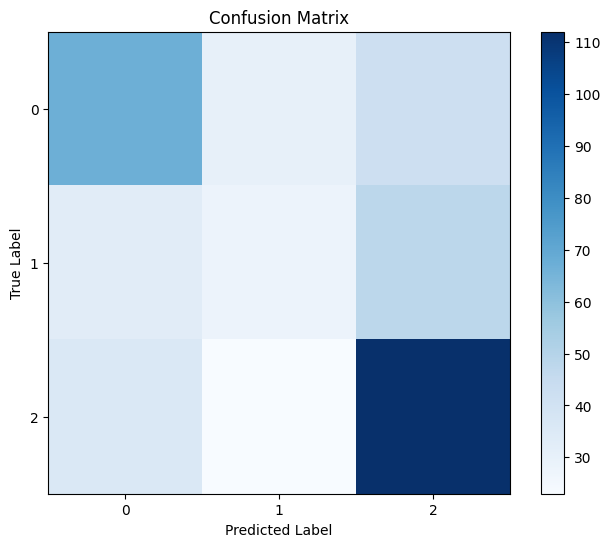

In [14]:
evaluate_model(offside_mind, x_test, y_test)

In [15]:
save_model()

Model and mappings saved successfully.
